In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
prices = pd.read_csv('vbr16_19.csv', index_col='Date')
prices_train = prices.loc[:'2019-01-01']
prices_trade = prices.loc['2019-01-01':]

In [3]:
returns_train = prices_train.pct_change().dropna()
returns_train

,IEX,NUAN,MOH,NVAX,SBNY,PWR,WSM,FANG,BRO,STLD,...,RES,LE,APEI,FF,WK,PKI,ALGT,SAGE,OII,DRQ
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-05,-0.018009,-0.031908,-0.031908,-0.034713,-0.022381,-0.005610,-0.037462,-0.011155,-0.010512,-0.001206,...,-0.026684,-0.025656,-0.054217,-0.001852,-0.001485,-0.011584,-0.028633,0.005788,-0.041051,-0.043316
2016-07-06,0.009542,0.001318,0.008914,0.031812,0.015428,0.018229,0.014278,0.010834,0.005720,0.027364,...,-0.003264,-0.014084,0.032971,0.003711,-0.003717,0.007685,0.006712,0.033248,0.007534,0.005129
2016-07-07,0.006383,0.017117,0.005959,0.000000,0.013233,0.008525,-0.004821,-0.021105,-0.003521,0.012142,...,-0.007859,0.004348,0.008342,-0.007394,0.011940,0.002669,0.001306,-0.004950,-0.002379,0.001056
2016-07-08,0.022686,0.025890,0.025531,0.021448,0.016124,0.029586,0.049021,0.006434,0.014950,0.030960,...,0.021122,0.032777,0.029856,0.041900,0.022124,0.025860,0.017161,0.056281,0.014651,0.004570
2016-07-11,0.009064,0.002524,0.013742,0.019685,0.009997,0.012726,0.019579,0.006057,-0.009641,0.010135,...,-0.010989,0.000000,-0.004890,0.000000,0.006494,0.000186,-0.008436,-0.009420,-0.011417,-0.010324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,-0.040983,-0.014537,-0.022377,-0.089474,-0.018088,-0.011327,-0.031064,-0.034922,-0.017339,-0.035525,...,-0.028542,0.007223,-0.028446,-0.009210,0.002779,-0.026811,-0.013130,0.019893,-0.029229,-0.032781
2018-12-26,0.042397,0.030279,0.063479,0.156069,0.045106,0.066237,0.093764,0.073771,0.030303,0.036833,...,0.074502,0.137052,0.028529,0.039841,0.055419,0.053291,-0.003446,0.064617,0.076642,0.079702
2018-12-27,0.014231,-0.011304,-0.002614,-0.060000,-0.029535,0.013096,0.000201,0.009675,0.004468,-0.005312,...,-0.023437,-0.012614,0.000730,-0.003831,0.000875,0.023778,-0.022861,-0.012139,0.009322,0.018282


In [4]:
# market returns
import yfinance as yf
market_price_train = yf.download('VBR', start='2016-07-01', end='2019-01-01')['Adj Close']
market_ret_train = market_price_train.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


In [5]:
market_ret_train

Date
2016-07-05   -0.015804
2016-07-06    0.005481
2016-07-07    0.000669
2016-07-08    0.019018
2016-07-11    0.008347
                ...   
2018-12-24   -0.024959
2018-12-26    0.043728
2018-12-27    0.003551
2018-12-28    0.001415
2018-12-31    0.007419
Name: Adj Close, Length: 628, dtype: float64

In [6]:
# calculate and normalize cumulative returns
cumret_train = np.cumprod(prices_train.pct_change().dropna() + 1)
cumret_train = cumret_train / cumret_train.iloc[0]
cumret_train

,IEX,NUAN,MOH,NVAX,SBNY,PWR,WSM,FANG,BRO,STLD,...,RES,LE,APEI,FF,WK,PKI,ALGT,SAGE,OII,DRQ
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2016-07-06,1.009542,1.001318,1.008914,1.031812,1.015428,1.018229,1.014278,1.010834,1.005720,1.027364,...,0.996736,0.985916,1.032971,1.003711,0.996283,1.007685,1.006712,1.033248,1.007534,1.005129
2016-07-07,1.015985,1.018457,1.014925,1.031812,1.028865,1.026910,1.009388,0.989500,1.002179,1.039839,...,0.988903,0.990202,1.041589,0.996289,1.008178,1.010375,1.008027,1.028133,1.005137,1.006190
2016-07-08,1.039034,1.044825,1.040837,1.053942,1.045455,1.057292,1.058869,0.995867,1.017162,1.072032,...,1.009791,1.022658,1.072686,1.038033,1.030483,1.036503,1.025325,1.085997,1.019863,1.010789
2016-07-11,1.048451,1.047462,1.055141,1.074689,1.055906,1.070746,1.079601,1.001899,1.007355,1.082898,...,0.998694,1.022658,1.067441,1.038033,1.037175,1.036696,1.016676,1.075767,1.008219,1.000354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,1.520271,0.849044,2.236940,0.239281,0.841437,1.212240,0.961327,0.959828,1.464461,1.215812,...,0.647504,0.768524,0.998127,1.703115,2.414870,1.395550,0.759198,2.671675,0.387942,0.474885
2018-12-26,1.584726,0.874753,2.378939,0.276625,0.879391,1.292534,1.051464,1.030636,1.508839,1.260594,...,0.695744,0.873852,1.026602,1.770969,2.548699,1.469920,0.756582,2.844309,0.417675,0.512734
2018-12-27,1.607279,0.864865,2.372720,0.260028,0.853418,1.309462,1.051675,1.040608,1.515580,1.253898,...,0.679438,0.862829,1.027351,1.764183,2.550930,1.504872,0.739286,2.809783,0.421569,0.522108


# Pair selection

In [7]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

In [8]:
pair_metrics = pd.DataFrame(columns=['MDM', 'ADF', 'G_12', 'G_21', 'MFR'])

for s1 in cumret_train.columns:
    for s2 in cumret_train.columns:
        if (s1!=s2) and (f'{s1}-{s2}' not in pair_metrics.index) and (f'{s2}-{s1}' not in pair_metrics.index):
            # distance
            pair_metrics.loc[f'{s1}-{s2}', ['MDM']] = ((cumret_train[s1] - cumret_train[s2])**2).sum()
            # ADF test
            spread = prices_train[s1] / prices_train[s2]
            pair_metrics.loc[f'{s1}-{s2}', ['ADF']] = adfuller(spread)[1]
            # two-way Granger causality test
            g12_pval = grangercausalitytests(prices_train[[s1, s2]], maxlag=1, verbose=False)[1][0]['ssr_chi2test'][1]
            g21_pval = grangercausalitytests(prices_train[[s2, s1]], maxlag=1, verbose=False)[1][0]['ssr_chi2test'][1]
            pair_metrics.loc[f'{s1}-{s2}', ['G_12']] = g12_pval
            pair_metrics.loc[f'{s1}-{s2}', ['G_21']] = g21_pval
            # market factor ratio
            beta1 = np.cov(returns_train[s1], market_ret_train)[0,1] / np.var(market_ret_train)
            beta2 = np.cov(returns_train[s2], market_ret_train)[0,1] / np.var(market_ret_train)
            pair_metrics.loc[f'{s1}-{s2}', ['MFR']] = abs(beta1/beta2 - 1)

"\npair_metrics = pd.DataFrame(columns=['MDM', 'ADF', 'G_12', 'G_21', 'MFR'])\n\nfor s1 in cumret_train.columns:\n    for s2 in cumret_train.columns:\n        if (s1!=s2) and (f'{s1}-{s2}' not in pair_metrics.index) and (f'{s2}-{s1}' not in pair_metrics.index):\n            pair_metrics.loc[f'{s1}-{s2}', ['MDM']] = ((cumret_train[s1] - cumret_train[s2])**2).sum()\n            spread = prices_train[s1] / prices_train[s2]\n            pair_metrics.loc[f'{s1}-{s2}', ['ADF']] = adfuller(spread)[1]\n            g12_pval = grangercausalitytests(prices_train[[s1, s2]], maxlag=1, verbose=False)[1][0]['ssr_chi2test'][1]\n            g21_pval = grangercausalitytests(prices_train[[s2, s1]], maxlag=1, verbose=False)[1][0]['ssr_chi2test'][1]\n            pair_metrics.loc[f'{s1}-{s2}', ['G_12']] = g12_pval\n            pair_metrics.loc[f'{s1}-{s2}', ['G_21']] = g21_pval\n            beta1 = np.cov(returns_train[s1], market_ret_train)[0,1] / np.var(market_ret_train)\n            beta2 = np.cov(return

In [117]:
pair_metrics

,MDM,ADF,G_12,G_21,MFR
IEX-NUAN,180.825724,0.682333,0.915787,0.545211,0.053939
IEX-MOH,114.851914,0.470081,0.070598,0.005269,0.267765
IEX-NVAX,1058.908409,0.075500,0.424002,0.922708,0.497808
IEX-SBNY,172.563274,0.855315,0.888580,0.086780,0.127703
IEX-PWR,44.777389,0.835062,0.394445,0.208465,0.229517
...,...,...,...,...,...
ALGT-OII,37.965459,0.373861,0.973833,0.082572,0.322410
ALGT-DRQ,22.620837,0.101153,0.197957,0.137570,0.312317
SAGE-OII,4951.736804,0.759631,0.105450,0.710494,0.215635
SAGE-DRQ,4813.738763,0.727066,0.603535,0.845509,0.233742


In [11]:
def parse_pair(pair):
    s1 = pair[:pair.find('-')]
    s2 = pair[pair.find('-')+1:]
    return s1,s2

In [12]:
pair_metrics.sort_values(by='MFR')

,MDM,ADF,G_12,G_21,MFR
AEO-KFRC,121.731294,0.111954,0.186402,0.074530,0.000005
BCC-FOE,32.544756,0.053423,0.286553,0.401040,0.000007
LAMR-ROIC,32.578505,0.643541,0.110023,0.365176,0.000008
MTX-CNX,27.811056,0.090720,0.579286,0.783594,0.000014
AR-URBN,154.402592,0.897100,0.905135,0.600554,0.000014
...,...,...,...,...,...
MRTX-PNW,11912.757575,0.804528,0.872792,0.462932,8.727490
CAR-PNW,43.874719,0.594094,0.317067,0.295787,9.193938
X-PNW,367.257852,0.446113,0.137176,0.742849,9.291800
NVAX-PNW,411.005603,0.012617,0.948614,0.090366,9.314787


In [13]:
pairs = {}
stocks = {}
pairs['MFR'] = []
stocks['MFR'] = []

for pair in pair_metrics.sort_values(by='MFR').index:
    s1,s2 = parse_pair(pair)
    if (s1 not in stocks['MFR']) and (s2 not in stocks['MFR']):
        stocks['MFR'].append(s1)
        stocks['MFR'].append(s2)
        pairs['MFR'].append(pair)
    if len(pairs['MFR'])>=5:
        break

In [14]:
pairs['MFR']

['AEO-KFRC', 'BCC-FOE', 'LAMR-ROIC', 'MTX-CNX', 'AR-URBN']

In [15]:
stocks['MFR']

['AEO', 'KFRC', 'BCC', 'FOE', 'LAMR', 'ROIC', 'MTX', 'CNX', 'AR', 'URBN']

In [16]:
condition = ((pair_metrics['ADF'] < 0.05) & (pair_metrics['G_12'] < 0.05) & (pair_metrics['G_21'] < 0.05))
pair_metrics[condition].sort_values(by='MFR')

,MDM,ADF,G_12,G_21,MFR
CLR-BKE,25.778866,0.001244,0.008229,0.046326,0.001298
FLOW-KRO,4080.062488,0.000119,0.001510,0.012194,0.010354
PACW-GWB,2.285298,0.046568,0.012419,0.000089,0.010852
CRS-KRO,4823.762441,0.000009,0.018592,0.011247,0.011030
RS-WLK,601.458585,0.005025,0.002816,0.029127,0.012613
...,...,...,...,...,...
MSA-PMT,73.488301,0.004134,0.003073,0.023889,1.299210
CFR-FLO,189.024800,0.001668,0.048353,0.010795,1.542371
WWD-SR,42.945951,0.010118,0.048619,0.040980,1.583771
GBCI-BXMT,45.208366,0.017087,0.010955,0.040484,1.993233


In [17]:
pairs['ADF_G_MFR'] = []
stocks['ADF_G_MFR'] = []

for pair in pair_metrics[condition].sort_values(by='MFR').index:
    s1,s2 = parse_pair(pair)
    if (s1 not in stocks['ADF_G_MFR']) and (s2 not in stocks['ADF_G_MFR']):
        stocks['ADF_G_MFR'].append(s1)
        stocks['ADF_G_MFR'].append(s2)
        pairs['ADF_G_MFR'].append(pair)
    if len(pairs['ADF_G_MFR'])>=5:
        break   

In [18]:
pairs['ADF_G_MFR']

['CLR-BKE', 'FLOW-KRO', 'PACW-GWB', 'RS-WLK', 'HELE-PAHC']

In [19]:
stocks['ADF_G_MFR']

['CLR', 'BKE', 'FLOW', 'KRO', 'PACW', 'GWB', 'RS', 'WLK', 'HELE', 'PAHC']

In [20]:
condition = (pair_metrics['ADF'] < 0.05)
pair_metrics[condition].sort_values(by='MFR')

,MDM,ADF,G_12,G_21,MFR
BRO-ARES,26.424838,0.021817,0.627575,0.007154,0.000079
IOSP-GBX,38.426633,0.046270,0.788266,0.140475,0.000109
TGNA-BANF,492.536509,0.034971,0.387823,0.070654,0.000114
EGHT-PIPR,390.104215,0.015137,0.031584,0.275073,0.000115
DCI-ESE,7.348283,0.008627,0.301537,0.431201,0.000166
...,...,...,...,...,...
RBC-PNW,90.451894,0.016823,0.550551,0.008388,5.879502
NVAX-AVA,476.880116,0.013625,0.797457,0.175041,6.340856
NVAX-POR,393.737570,0.008993,0.844319,0.141091,6.430975
TKR-PNW,158.896023,0.043549,0.890205,0.281903,6.840326


In [21]:
pairs['ADF_MFR'] = []
stocks['ADF_MFR'] = []

for pair in pair_metrics[condition].sort_values(by='MFR').index:
    s1,s2 = parse_pair(pair)
    if (s1 not in stocks['ADF_MFR']) and (s2 not in stocks['ADF_MFR']):
        stocks['ADF_MFR'].append(s1)
        stocks['ADF_MFR'].append(s2)
        pairs['ADF_MFR'].append(pair)
    if len(pairs['ADF_MFR'])>=5:
        break   

In [22]:
pairs['ADF_MFR']

['BRO-ARES', 'IOSP-GBX', 'TGNA-BANF', 'EGHT-PIPR', 'DCI-ESE']

In [23]:
stocks['ADF_MFR']

['BRO', 'ARES', 'IOSP', 'GBX', 'TGNA', 'BANF', 'EGHT', 'PIPR', 'DCI', 'ESE']

In [24]:
condition = ((pair_metrics['G_12'] < 0.05) & (pair_metrics['G_21'] < 0.05))
pair_metrics[condition].sort_values(by='MFR')

,MDM,ADF,G_12,G_21,MFR
EPC-STFC,244.603910,0.662727,0.036233,0.000477,0.000089
STAR-ARGO,17.304716,0.959424,0.045238,0.035394,0.000201
VG-RMBS,301.164691,0.793317,0.001438,0.008095,0.000258
GWB-KOP,27.422930,0.957021,0.005377,0.032149,0.000274
NLSN-SAFT,259.888661,0.467242,0.031905,0.046727,0.000342
...,...,...,...,...,...
UNVR-AVA,110.624700,0.666695,0.044111,0.002297,3.695878
CC-IDA,11221.615240,0.263078,0.006845,0.022598,4.115610
CFX-AVA,84.166028,0.797124,0.031810,0.009604,4.282206
TTEK-PNW,274.246550,0.357144,0.026770,0.046226,5.037330


In [25]:
pairs['G_MFR'] = []
stocks['G_MFR'] = []

for pair in pair_metrics[condition].sort_values(by='MFR').index:
    s1,s2 = parse_pair(pair)
    if (s1 not in stocks['G_MFR']) and (s2 not in stocks['G_MFR']):
        stocks['G_MFR'].append(s1)
        stocks['G_MFR'].append(s2)
        pairs['G_MFR'].append(pair)
    if len(pairs['G_MFR'])>=5:
        break  

In [26]:
pairs['G_MFR']

['EPC-STFC', 'STAR-ARGO', 'VG-RMBS', 'GWB-KOP', 'NLSN-SAFT']

In [27]:
stocks['G_MFR']

['EPC', 'STFC', 'STAR', 'ARGO', 'VG', 'RMBS', 'GWB', 'KOP', 'NLSN', 'SAFT']

In [28]:
pair_metrics['G_sum'] = pair_metrics['G_12'] + pair_metrics['G_21']
pair_metrics

,MDM,ADF,G_12,G_21,MFR,G_sum
IEX-NUAN,180.825724,0.682333,0.915787,0.545211,0.053939,1.460998
IEX-MOH,114.851914,0.470081,0.070598,0.005269,0.267765,0.075866
IEX-NVAX,1058.908409,0.075500,0.424002,0.922708,0.497808,1.346710
IEX-SBNY,172.563274,0.855315,0.888580,0.086780,0.127703,0.975360
IEX-PWR,44.777389,0.835062,0.394445,0.208465,0.229517,0.602910
...,...,...,...,...,...,...
ALGT-OII,37.965459,0.373861,0.973833,0.082572,0.322410,1.056404
ALGT-DRQ,22.620837,0.101153,0.197957,0.137570,0.312317,0.335528
SAGE-OII,4951.736804,0.759631,0.105450,0.710494,0.215635,0.815944
SAGE-DRQ,4813.738763,0.727066,0.603535,0.845509,0.233742,1.449044


In [29]:
pair_metrics.sort_values(by='G_sum')

,MDM,ADF,G_12,G_21,MFR,G_sum
RAMP-POLY,76.470416,0.998229,0.000072,0.000005,0.079216,0.000077
EAT-OI,89.095087,0.737138,0.000029,0.000054,0.255319,0.000083
MUR-PBF,204.435265,0.517367,0.000112,0.000218,0.010538,0.000330
PVH-DIN,204.347932,0.527551,0.000249,0.000092,0.338639,0.000341
UNF-ANAT,31.393641,0.475868,0.000095,0.000309,0.188865,0.000405
...,...,...,...,...,...,...
FHN-KN,35.698234,0.257007,0.998381,0.991011,0.241564,1.989392
NVAX-RAMP,896.400960,0.000886,0.993418,0.998220,0.649986,1.991638
BECN-AZZ,33.935133,0.705596,0.991973,0.999804,0.136675,1.991777
RL-PFS,59.149706,0.548269,0.998656,0.993447,0.016946,1.992103


In [30]:
pairs['G'] = []
stocks['G'] = []

for pair in pair_metrics.sort_values(by='G_sum').index:
    s1,s2 = parse_pair(pair)
    if (s1 not in stocks['G']) and (s2 not in stocks['G']):
        stocks['G'].append(s1)
        stocks['G'].append(s2)
        pairs['G'].append(pair)
    if len(pairs['G'])>=5:
        break  

In [31]:
pairs['G']

['RAMP-POLY', 'EAT-OI', 'MUR-PBF', 'PVH-DIN', 'UNF-ANAT']

In [32]:
stocks['G']

['RAMP', 'POLY', 'EAT', 'OI', 'MUR', 'PBF', 'PVH', 'DIN', 'UNF', 'ANAT']

In [33]:
condition = (pair_metrics['ADF'] < 0.05)
pair_metrics[condition].sort_values(by='G_sum')

,MDM,ADF,G_12,G_21,MFR,G_sum
MAT-RRC,12.900077,1.644559e-02,0.000730,0.000635,0.530703,0.001366
AIZ-ASB,87.426005,2.922954e-02,0.000823,0.003131,0.274802,0.003954
ORI-MTRN,377.111039,2.627201e-02,0.000009,0.004744,0.272397,0.004753
MIC-PDCO,24.198947,1.920887e-03,0.001797,0.003162,0.075697,0.004959
IDA-VRNT,20.741027,1.094953e-05,0.004036,0.000949,0.626087,0.004984
...,...,...,...,...,...,...
SWX-AIR,345.566291,2.456047e-02,0.045251,0.046396,0.567142,0.091647
UNFI-MDGL,95459.784419,9.837782e-07,0.045109,0.047502,0.147895,0.092612
STBA-KRO,3992.087755,4.981801e-02,0.044548,0.048179,0.319823,0.092727
MAT-SIG,17.713671,4.898741e-02,0.044521,0.048445,0.439006,0.092966


In [34]:
pairs['ADF_G'] = []
stocks['ADF_G'] = []

for pair in pair_metrics[condition].sort_values(by='G_sum').index:
    s1,s2 = parse_pair(pair)
    if (s1 not in stocks['ADF_G']) and (s2 not in stocks['ADF_G']):
        stocks['ADF_G'].append(s1)
        stocks['ADF_G'].append(s2)
        pairs['ADF_G'].append(pair)
    if len(pairs['ADF_G'])>=5:
        break 

In [35]:
pairs['ADF_G']

['MAT-RRC', 'AIZ-ASB', 'ORI-MTRN', 'MIC-PDCO', 'IDA-VRNT']

In [36]:
stocks['ADF_G']

['MAT', 'RRC', 'AIZ', 'ASB', 'ORI', 'MTRN', 'MIC', 'PDCO', 'IDA', 'VRNT']

In [37]:
pair_metrics.sort_values(by='MDM')

,MDM,ADF,G_12,G_21,MFR,G_sum
CENTA-CENT,0.543676,3.559182e-01,0.222665,0.141985,0.037948,0.364650
IDA-OGS,0.623026,9.562674e-02,0.531505,0.008557,0.280482,0.540062
FRT-RPAI,0.631557,1.768123e-01,0.577539,0.604148,0.117272,1.181687
RPAI-AKR,0.681916,1.305450e-01,0.166627,0.980959,0.111069,1.147586
OGS-NJR,0.733225,1.927229e-02,0.000762,0.141063,0.090865,0.141825
...,...,...,...,...,...,...
SWN-MDGL,99197.996103,3.416160e-05,0.969094,0.199774,0.575993,1.168868
RRC-MDGL,99758.686660,4.632437e-07,0.893288,0.120308,0.343225,1.013596
VSTO-MDGL,100190.689435,1.378195e-12,0.897276,0.310297,0.440636,1.207573
MDGL-RAD,101358.761561,9.047354e-01,0.217493,0.763609,0.035961,0.981102


In [38]:
pairs['MDM'] = []
stocks['MDM'] = []

for pair in pair_metrics.sort_values(by='MDM').index:
    s1,s2 = parse_pair(pair)
    if (s1 not in stocks['MDM']) and (s2 not in stocks['MDM']):
        stocks['MDM'].append(s1)
        stocks['MDM'].append(s2)
        pairs['MDM'].append(pair)
    if len(pairs['MDM'])>=5:
        break 

In [39]:
pairs['MDM']

['CENTA-CENT', 'IDA-OGS', 'FRT-RPAI', 'WTM-EQC', 'EPR-LTC']

In [40]:
stocks['MDM']

['CENTA', 'CENT', 'IDA', 'OGS', 'FRT', 'RPAI', 'WTM', 'EQC', 'EPR', 'LTC']

In [41]:
pairs

{'MFR': ['AEO-KFRC', 'BCC-FOE', 'LAMR-ROIC', 'MTX-CNX', 'AR-URBN'],
 'ADF_G_MFR': ['CLR-BKE', 'FLOW-KRO', 'PACW-GWB', 'RS-WLK', 'HELE-PAHC'],
 'ADF_MFR': ['BRO-ARES', 'IOSP-GBX', 'TGNA-BANF', 'EGHT-PIPR', 'DCI-ESE'],
 'G_MFR': ['EPC-STFC', 'STAR-ARGO', 'VG-RMBS', 'GWB-KOP', 'NLSN-SAFT'],
 'G': ['RAMP-POLY', 'EAT-OI', 'MUR-PBF', 'PVH-DIN', 'UNF-ANAT'],
 'ADF_G': ['MAT-RRC', 'AIZ-ASB', 'ORI-MTRN', 'MIC-PDCO', 'IDA-VRNT'],
 'MDM': ['CENTA-CENT', 'IDA-OGS', 'FRT-RPAI', 'WTM-EQC', 'EPR-LTC']}

# Window selection

In [42]:
# create a list of all pairs (remove any duplicates)
all_pairs = set()
for k in pairs.keys():
    for x in pairs[k]:
        all_pairs.append(x)
all_pairs = list(all_pairs)

In [43]:
returns_train.loc['2018-01-01':].index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-16',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=251)

In [44]:
window_train_index = returns_train.loc['2018-01-01':].index

z_open = 2 # z-score for opening positions
z_close = 0 # z-score for closing positions

windows = 2*np.array([24, 36, 48, 60, 72]) # windows in days
win_2std_df = pd.DataFrame(index=all_pairs, columns=windows)

for W in windows:
    for pair in all_pairs:
        s1,s2 = parse_pair(pair)
        positions = pd.DataFrame(index=window_train_index, columns=[s1,s2])
        
        # indicators of long\short positions
        short = False
        long = False

        for t in window_train_index:
            prices_tmp = prices_train.loc[:t]
            prices_tmp = prices_tmp.iloc[-W:]
            
            spread = prices_tmp[s1] / prices_tmp[s2]
            mu = spread.mean()
            sigma = spread.std()
            
            if spread[-1] > mu + z_open*sigma:
                # open short position
                short = True
                positions.loc[t] = [-1,1]
            elif spread[-1] < mu - z_open*sigma:
                # open long positions
                long = True
                positions.loc[t] = [1,-1]
            elif short and (spread[-1] < mu + z_close*sigma):
                # close short position
                short = False
                positions.loc[t] = [0,0]
            elif long and (spread[-1] > mu - z_close*sigma):
                # close long positions
                long = False
                positions.loc[t] = [0,0]

        positions.fillna(method='ffill', inplace=True)
        positions.fillna(0, inplace=True)
        cumret = np.cumprod((positions.shift() * returns_train.loc[window_train_index, [s1,s2]]).sum(axis=1)+1)
        
        win_2std_df.loc[pair, W] = cumret[-1]

In [45]:
win_2std_df = win_2std_df.astype(float)

In [82]:
win_2std_df.head(10)

,48,72,96,120,144
AEO-KFRC,1.602493,1.781663,1.927423,1.273313,1.111509
BCC-FOE,1.112348,1.155942,1.255928,1.326088,1.398667
LAMR-ROIC,1.342430,1.232027,1.248817,1.065792,0.969151
MTX-CNX,1.609240,1.485372,1.630898,1.697116,1.695121
AR-URBN,1.285440,0.954828,0.753550,0.772083,0.912035
CLR-BKE,1.115031,1.399176,1.244315,1.803326,1.539421
FLOW-KRO,0.748404,0.865778,0.885851,0.926704,0.931465
PACW-GWB,1.331137,0.992190,1.006633,0.958659,0.968811
RS-WLK,1.127640,0.967642,0.934959,0.866623,0.786318
HELE-PAHC,0.594256,0.596516,0.520984,0.612795,0.630199


In [83]:
pairs.keys()

dict_keys(['MFR', 'ADF_G_MFR', 'ADF_MFR', 'G_MFR', 'G', 'ADF_G', 'MDM'])

In [84]:
win_2std_df[win_2std_df<1].loc[pairs['MFR']]

,48,72,96,120,144
AEO-KFRC,NaN,NaN,NaN,NaN,NaN
BCC-FOE,NaN,NaN,NaN,NaN,NaN
LAMR-ROIC,NaN,NaN,NaN,NaN,0.969151
MTX-CNX,NaN,NaN,NaN,NaN,NaN
AR-URBN,NaN,0.954828,0.75355,0.772083,0.912035


In [85]:
win_2std_df[win_2std_df<1].loc[pairs['ADF_G_MFR']]

,48,72,96,120,144
CLR-BKE,NaN,NaN,NaN,NaN,NaN
FLOW-KRO,0.748404,0.865778,0.885851,0.926704,0.931465
PACW-GWB,NaN,0.992190,NaN,0.958659,0.968811
RS-WLK,NaN,0.967642,0.934959,0.866623,0.786318
HELE-PAHC,0.594256,0.596516,0.520984,0.612795,0.630199


In [86]:
win_2std_df[win_2std_df<1].loc[pairs['ADF_MFR']]

,48,72,96,120,144
BRO-ARES,0.980904,NaN,NaN,NaN,NaN
IOSP-GBX,0.901868,0.874665,NaN,NaN,NaN
TGNA-BANF,0.911697,0.847400,0.916126,0.822104,0.900712
EGHT-PIPR,NaN,NaN,NaN,0.941243,0.954892
DCI-ESE,0.921720,NaN,NaN,NaN,NaN


In [87]:
win_2std_df[win_2std_df<1].loc[pairs['G_MFR']]

,48,72,96,120,144
EPC-STFC,0.492854,0.808284,0.983844,0.977664,0.854650
STAR-ARGO,0.822359,0.865406,0.842448,0.870840,0.728982
VG-RMBS,0.724178,0.664362,0.621462,0.568267,0.586402
GWB-KOP,0.848394,0.524802,0.691690,0.621667,0.666997
NLSN-SAFT,0.801198,0.771121,0.743907,0.785322,0.806992


In [88]:
win_2std_df[win_2std_df<1].loc[pairs['G']]

,48,72,96,120,144
RAMP-POLY,0.802347,0.551718,0.633774,0.684927,0.776627
EAT-OI,0.665566,0.733854,NaN,0.813134,0.612153
MUR-PBF,NaN,NaN,NaN,NaN,NaN
PVH-DIN,0.730790,0.976601,0.745438,0.752504,0.788862
UNF-ANAT,0.821404,0.874399,0.949143,0.996563,NaN


In [89]:
win_2std_df[win_2std_df<1].loc[pairs['ADF_G']]

,48,72,96,120,144
MAT-RRC,NaN,NaN,NaN,NaN,NaN
AIZ-ASB,NaN,NaN,NaN,NaN,0.995367
ORI-MTRN,NaN,NaN,NaN,0.954882,0.928664
MIC-PDCO,NaN,NaN,NaN,NaN,NaN
IDA-VRNT,NaN,NaN,NaN,NaN,NaN


In [90]:
win_2std_df[win_2std_df<1].loc[pairs['MFR']]

,48,72,96,120,144
AEO-KFRC,NaN,NaN,NaN,NaN,NaN
BCC-FOE,NaN,NaN,NaN,NaN,NaN
LAMR-ROIC,NaN,NaN,NaN,NaN,0.969151
MTX-CNX,NaN,NaN,NaN,NaN,NaN
AR-URBN,NaN,0.954828,0.75355,0.772083,0.912035


# Backtest (2std)

In [49]:
# create a dataframe of returns during trading period
returns_trade = prices_trade.pct_change().dropna()

In [50]:
positions_2std = {}

z_open = 2 # z-score for opening positions
z_close = 0 # z-score for closing positions

for method in pairs.keys():
    positions = pd.DataFrame(index=prices_trade.index, columns=stocks[method])
    
    for pair in pairs[method]:
        W = win_2std_df.loc[pair].idxmax() # window size
        s1,s2 = parse_pair(pair)
        
        # indicators of long\short positions
        short = False
        long = False
        
        for t in positions.index:
            prices_tmp = prices.loc[:t]
            prices_tmp = prices_tmp.iloc[-W:] # use W last datapoints
            # calculate spread and its mean and standard deviation
            spread = prices_tmp[s1] / prices_tmp[s2]
            mu = spread.mean()
            sigma = spread.std()
                
            if spread[-1] > mu + z_open*sigma:
                # open short position
                short = True
                positions.loc[t,[s1,s2]] = [-1,1]
            elif spread[-1] < mu - z_open*sigma:
                # open long positions
                long = True
                positions.loc[t,[s1,s2]] = [1,-1]
            elif short and (spread[-1] < mu + z_close*sigma):
                # close short position
                short = False
                positions.loc[t,[s1,s2]] = [0,0]
            elif long and (spread[-1] > mu - z_close*sigma):
                # close long positions
                long = False
                positions.loc[t,[s1,s2]] = [0,0]

    positions.fillna(method='ffill', inplace=True)
    positions.fillna(0, inplace=True)
    positions_2std[method] = positions

In [51]:
rets = {}
cumrets = {}

for method in pairs.keys():
    positions = positions_2std[method]
    ret = (positions.shift() * returns_trade[positions.columns]).sum(axis=1) / 5 * 2
    rets[method] = ret
    cumrets[method] = np.nancumprod(ret+1)

In [52]:
def calculate_metrics(cumret):
    '''
    calculate performance metrics from cumulative returns
    '''
    total_return = (cumret[-1] - cumret[0])/cumret[0]
    apr = (1+total_return)**(252/len(cumret)) - 1
    rets = pd.DataFrame(cumret).pct_change()
    sharpe = np.sqrt(252) * np.nanmean(rets) / np.nanstd(rets)
    
    # maxdd and maxddd
    highwatermark=np.zeros(cumret.shape)
    drawdown=np.zeros(cumret.shape)
    drawdownduration=np.zeros(cumret.shape)
    for t in np.arange(1, cumret.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
        drawdown[t]=cumret[t]/highwatermark[t]-1
        if drawdown[t]==0:
            drawdownduration[t]=0
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
    maxDD=np.min(drawdown)
    maxDDD=np.max(drawdownduration)
    
    return total_return, apr, sharpe, maxDD, maxDDD

In [53]:
performance_2std = pd.DataFrame(index=pairs.keys(), 
                                columns=['Total return', 'APR', 'Sharpe', 'maxDD', 'maxDDD'])
for method in pairs.keys():
    performance_2std.loc[method] = calculate_metrics(cumrets[method])

In [54]:
performance_2std

,Total return,APR,Sharpe,maxDD,maxDDD
MFR,-0.252971,-0.253838,-0.534181,-0.454785,105.0
ADF_G_MFR,-0.155046,-0.155613,-0.375384,-0.35578,123.0
ADF_MFR,-0.129096,-0.129575,-0.566102,-0.307366,219.0
G_MFR,-0.244861,-0.245706,-0.953749,-0.318445,228.0
G,0.383749,0.385541,1.268024,-0.207856,104.0
ADF_G,-0.159594,-0.160176,-0.306041,-0.435751,231.0
MDM,0.009192,0.009229,0.15401,-0.07169,133.0


# Vasicek model

In [91]:
def generate_data(sigma, theta, kappa, N):
    '''
    generate data which follows Vasicek model with given parameters
    
    Args:
        sigma (float): volatility
        theta (float): long-term mean
        kappa (float): speed of mean-reversion
        N (int): number of datapoints to generate
            
    Returns:
        (numpy.ndarray): time series which follows Vasicek model
    '''
    # generate random noise
    epsilon = sigma * np.random.normal(size=N)
    
    # generate time series
    R = np.zeros(N)
    R[0] = theta
    for i in range(1,N):
        R[i] = R[i-1] + kappa * (theta - R[i-1]) + epsilon[i]
        
    return R

In [99]:
sigma = 0.1
theta = 3.5
kappa = 0.1
N = 500

np.random.seed(66)
R = generate_data(sigma, theta, kappa, N)

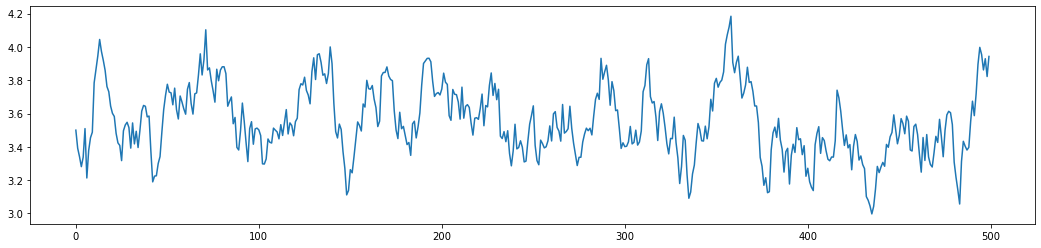

In [100]:
plt.figure(figsize=(18,4))
plt.plot(R)

In [101]:
np.std(R)

0.21117147328694755

In [102]:
def criterion(params, R):
    '''
    Criterion function for GMM
    
    Args:
        params (dictionary): model parameters
        R (numpy.ndarray): time series
            
    Returns:
        (float): value of criterion function
    '''
    
    S,Q,sigma_sq = params
    e1 = (Q + S*R[:-1]).sum()
    e2 = ((Q + S*R[:-1])**2 - sigma_sq).sum()
    
    return e1**2 + e2**2

In [106]:
from scipy import optimize

# generate new R
R = generate_data(sigma, theta, kappa, N)

# estimate parameters
params_init = [0.5, 0.5, np.var(R)]
S,Q,sigma_sq = optimize.minimize(criterion, params_init, args=R).x
print('kappa: ', -S)
print('theta: ', -Q/S)
print('sigma: ', np.sqrt(sigma_sq))

kappa:  0.38158382816854886
theta:  3.502998964805293
sigma:  0.08824991508503245


In [107]:
kappas = []
thetas = []
sigmas = []

for _ in range(1000):
    
    # generate new R
    R = generate_data(sigma, theta, kappa, N)
    
    # estimate parameters
    params_init = [0.5, 0.5, np.var(R)]
    S,Q,sigma_sq = optimize.minimize(criterion, params_init, args=R).x
    
    # save estimates
    kappas.append(-S)
    thetas.append(-Q/S)
    sigmas.append(np.sqrt(sigma_sq))

In [108]:
print('kappa: ', np.mean(kappas))
print('theta: ', np.mean(thetas))
print('sigma: ', np.mean(sigmas))

kappa:  0.5649116736458603
theta:  3.4992141822987732
sigma:  0.12542410792924213


# Window V2STD

In [61]:
window_train_index = returns_train.loc['2018-01-01':].index

z_open = 2 # z-score for opening positions
z_close = 0 # z-score for closing positions

windows = 2*np.array([24, 36, 48, 60, 72]) # windows in days
win_v2std_df = pd.DataFrame(index=all_pairs, columns=windows)

for W in windows:
    for pair in all_pairs:
        s1,s2 = parse_pair(pair)
        positions = pd.DataFrame(index=window_train_index, columns=[s1,s2])
        
        # indicators of long\short positions
        short = False
        long = False

        for t in window_train_index:
            prices_tmp = prices_train.loc[:t]
            prices_tmp = prices_tmp.iloc[-W:]
            spread = prices_tmp[s1] / prices_tmp[s2]
            
            # estimate parameters
            params_init = [0.5, 0.5, np.var(spread)]
            S,Q,sigma_sq = optimize.minimize(criterion, params_init, args=spread).x
            mu = -Q/S
            sigma = np.sqrt(sigma_sq)
            
            if spread[-1] > mu + z_open*sigma:
                # open short position
                short = True
                positions.loc[t] = [-1,1]
            elif spread[-1] < mu - z_open*sigma:
                # open long positions
                long = True
                positions.loc[t] = [1,-1]
            elif short and (spread[-1] < mu + z_close*sigma):
                # close short position
                short = False
                positions.loc[t] = [0,0]
            elif long and (spread[-1] > mu - z_close*sigma):
                # close long positions
                long = False
                positions.loc[t] = [0,0]

        positions.fillna(method='ffill', inplace=True)
        positions.fillna(0, inplace=True)
        cumret = np.cumprod((positions.shift() * returns_train.loc[window_train_index, [s1,s2]]).sum(axis=1)+1)
        
        win_v2std_df.loc[pair, W] = cumret[-1]

/tmp/ipykernel_38256/4271240276.py:26: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(sigma_sq)
/tmp/ipykernel_38256/4271240276.py:26: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(sigma_sq)
/tmp/ipykernel_38256/4271240276.py:26: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(sigma_sq)
/tmp/ipykernel_38256/4271240276.py:26: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(sigma_sq)
/tmp/ipykernel_38256/4271240276.py:26: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(sigma_sq)
/tmp/ipykernel_38256/4271240276.py:26: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(sigma_sq)
/tmp/ipykernel_38256/4271240276.py:26: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(sigma_sq)
/tmp/ipykernel_38256/4271240276.py:26: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(sigma_sq)
/tmp/ipykernel_38256/4271240276.py:26: RuntimeWarning: invalid v

In [65]:
win_v2std_df = win_v2std_df.astype(float)

In [66]:
win_v2std_df 

,48,72,96,120,144
AEO-KFRC,1.971949,1.818136,2.344446,2.008627,1.595316
BCC-FOE,1.158869,1.275759,1.264241,1.335401,1.691277
LAMR-ROIC,1.347104,1.434199,0.983720,1.156781,1.180235
MTX-CNX,1.808793,1.486319,1.810182,1.841422,1.297596
AR-URBN,0.884232,0.768787,0.655522,0.825311,0.643910
CLR-BKE,1.344063,1.524951,1.531010,1.769125,1.647391
FLOW-KRO,0.744319,1.022338,1.052711,0.998133,0.955738
PACW-GWB,1.260415,1.039740,0.956259,0.998857,0.956280
RS-WLK,1.046974,1.159272,0.931019,0.870504,0.939068
HELE-PAHC,0.572485,0.654152,0.530397,0.659710,0.697875


In [115]:
win_v2std_df.head(10)

,48,72,96,120,144
AEO-KFRC,1.971949,1.818136,2.344446,2.008627,1.595316
BCC-FOE,1.158869,1.275759,1.264241,1.335401,1.691277
LAMR-ROIC,1.347104,1.434199,0.983720,1.156781,1.180235
MTX-CNX,1.808793,1.486319,1.810182,1.841422,1.297596
AR-URBN,0.884232,0.768787,0.655522,0.825311,0.643910
CLR-BKE,1.344063,1.524951,1.531010,1.769125,1.647391
FLOW-KRO,0.744319,1.022338,1.052711,0.998133,0.955738
PACW-GWB,1.260415,1.039740,0.956259,0.998857,0.956280
RS-WLK,1.046974,1.159272,0.931019,0.870504,0.939068
HELE-PAHC,0.572485,0.654152,0.530397,0.659710,0.697875


In [67]:
win_v2std_df[win_v2std_df<1]

,48,72,96,120,144
AEO-KFRC,NaN,NaN,NaN,NaN,NaN
BCC-FOE,NaN,NaN,NaN,NaN,NaN
LAMR-ROIC,NaN,NaN,0.983720,NaN,NaN
MTX-CNX,NaN,NaN,NaN,NaN,NaN
AR-URBN,0.884232,0.768787,0.655522,0.825311,0.643910
CLR-BKE,NaN,NaN,NaN,NaN,NaN
FLOW-KRO,0.744319,NaN,NaN,0.998133,0.955738
PACW-GWB,NaN,NaN,0.956259,0.998857,0.956280
RS-WLK,NaN,NaN,0.931019,0.870504,0.939068
HELE-PAHC,0.572485,0.654152,0.530397,0.659710,0.697875


# Backtest V2STD

In [68]:
positions_v2std = {}

z_open = 2 # z-score for opening positions
z_close = 0 # z-score for closing positions

for method in pairs.keys():
    positions = pd.DataFrame(index=prices_trade.index, columns=stocks[method])
    
    for pair in pairs[method]:
        W = win_v2std_df.loc[pair].idxmax()
        s1,s2 = parse_pair(pair)
        
        # indicators of long\short positions
        short = False
        long = False
        
        for t in positions.index:
            prices_tmp = prices.loc[:t]
            prices_tmp = prices_tmp.iloc[-W:]
            
            # estimate parameters
            spread = prices_tmp[s1] / prices_tmp[s2]
            params_init = [0.5, 0.5, np.var(spread)]
            S,Q,sigma_sq = optimize.minimize(criterion, params_init, args=spread).x
            mu = -Q/S
            sigma = np.sqrt(sigma_sq)
                
            if spread[-1] > mu + z_open*sigma:
                # open short position
                short = True
                positions.loc[t,[s1,s2]] = [-1,1]
            elif spread[-1] < mu - z_open*sigma:
                # open long positions
                long = True
                positions.loc[t,[s1,s2]] = [1,-1]
            elif short and (spread[-1] < mu + z_close*sigma):
                # close short position
                short = False
                positions.loc[t,[s1,s2]] = [0,0]
            elif long and (spread[-1] > mu - z_close*sigma):
                # close long positions
                long = False
                positions.loc[t,[s1,s2]] = [0,0]

    positions.fillna(method='ffill', inplace=True)
    positions.fillna(0, inplace=True)
    positions_v2std[method] = positions

/tmp/ipykernel_38256/3321173368.py:25: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(sigma_sq)
/tmp/ipykernel_38256/3321173368.py:25: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(sigma_sq)
/tmp/ipykernel_38256/3321173368.py:25: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(sigma_sq)
/tmp/ipykernel_38256/3321173368.py:25: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(sigma_sq)
/tmp/ipykernel_38256/3321173368.py:25: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(sigma_sq)
/tmp/ipykernel_38256/3321173368.py:25: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(sigma_sq)
/tmp/ipykernel_38256/3321173368.py:25: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(sigma_sq)
/tmp/ipykernel_38256/3321173368.py:25: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(sigma_sq)
/tmp/ipykernel_38256/3321173368.py:25: RuntimeWarning: invalid v

In [69]:
rets = {}
cumrets = {}

for method in pairs.keys():
    positions = positions_v2std[method]
    ret = (positions.shift() * returns_trade[positions.columns]).sum(axis=1) / 5 * 2
    rets[method] = ret
    cumrets[method] = np.nancumprod(ret+1)

In [70]:
performance_v2std = pd.DataFrame(index=pairs.keys(), 
                                columns=['Total return', 'APR', 'Sharpe', 'maxDD', 'maxDDD'])
for method in pairs.keys():
    performance_v2std.loc[method] = calculate_metrics(cumrets[method])

In [71]:
performance_v2std

,Total return,APR,Sharpe,maxDD,maxDDD
MFR,-0.309027,-0.310044,-0.698105,-0.467844,190.0
ADF_G_MFR,-0.193078,-0.193767,-0.380456,-0.391689,123.0
ADF_MFR,-0.064535,-0.064784,-0.187975,-0.27299,221.0
G_MFR,-0.213071,-0.213822,-0.75539,-0.308098,235.0
G,0.536701,0.539333,1.56408,-0.197946,136.0
ADF_G,-0.228737,-0.229535,-0.437399,-0.453405,195.0
MDM,0.090319,0.090695,0.931274,-0.074419,99.0
